# 6.5 Machine Learning Part 2

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Cleaning Data
#### 3. The Elbow Technique
#### 4. K-means clustering

## 1. Importing Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# define path
path = r'C:\Users\samir\OneDrive\Documents\CareerFoundry - Data Analytics\Data Immersion\Acheivement 6 - Advanced Analytics & Dashboard Design'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, 'Data', 'timesdata_clean.csv'), index_col = False, encoding='latin-1')

## 2. Cleaning Data

In [5]:
df.shape

(2603, 15)

In [6]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international,female_male_ratio,percent_female,percent_male,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152,8.9,0.25,0,0.00,0.00,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243,6.9,0.27,33 : 67,0.33,0.67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074,9.0,0.33,37 : 63,0.37,0.63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596,7.8,0.22,1.79,0.42,0.58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,7929,8.4,0.27,1.91,0.45,0.55,2011


In [7]:
# creating subset without categorical columns or columns with larger scales
df2 = df[['teaching', 'international', 'research', 'citations', 'income']]

In [8]:
df2.describe()

,teaching,international,research,citations,income
count,2603.000000,2594.000000,2603.000000,2603.000000,2603.000000
mean,37.801498,52.007440,35.910257,60.921629,44.877833
std,17.604218,22.103825,21.254805,23.073219,24.396057
min,9.900000,7.100000,2.900000,1.200000,0.000000
25%,24.700000,33.425000,19.600000,45.500000,31.400000
50%,33.900000,50.300000,30.500000,62.500000,39.500000
75%,46.400000,69.000000,47.250000,79.050000,56.000000
max,99.700000,100.000000,99.400000,100.000000,100.000000


In [9]:
# checking for missing values
df.isnull().sum()

world_rank               0
university_name          0
country                  0
teaching                 0
international            9
research                 0
citations                0
income                   0
num_students             0
student_staff_ratio      0
percent_international    0
female_male_ratio        0
percent_female           0
percent_male             0
year                     0
dtype: int64

## 3. The elbow technique

In [10]:
# defining clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [12]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [13]:
# check for infinity
ds = df2.isin([np.inf, -np.inf])
print(ds)

      teaching  international  research  citations  income
0        False          False     False      False   False
1        False          False     False      False   False
2        False          False     False      False   False
3        False          False     False      False   False
4        False          False     False      False   False
...        ...            ...       ...        ...     ...
2598     False          False     False      False   False
2599     False          False     False      False   False
2600     False          False     False      False   False
2601     False          False     False      False   False
2602     False          False     False      False   False

[2603 rows x 5 columns]


In [14]:
count = np.isinf(df2).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


In [15]:
# check for NaN
x = float("nan")
print(f"It's np.isnan  : {np.isnan(x)}")

It's np.isnan  : True


In [16]:
df2.dropna()

,teaching,international,research,citations,income
0,99.7,72.4,98.7,98.8,34.5
1,97.7,54.6,98.0,99.9,83.7
2,97.8,82.3,91.4,99.9,87.5
3,98.3,29.5,98.1,99.2,64.3
4,90.9,70.3,95.4,99.9,0.0
...,...,...,...,...,...
2598,18.6,24.3,10.9,26.5,35.4
2599,14.5,14.9,7.6,19.3,44.0
2600,24.0,16.1,10.2,36.4,37.9
2601,20.1,23.3,16.0,13.5,40.4


In [17]:
df2 = df2.dropna()

In [18]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] 

score

C:\Users\samir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


[-6158907.569953739,
 -4386741.699672731,
 -3584972.268804838,
 -2978067.4399208887,
 -2589054.3521555564,
 -2359320.996407477,
 -2164838.414324648,
 -2002979.5245258734,
 -1874352.5370659493]

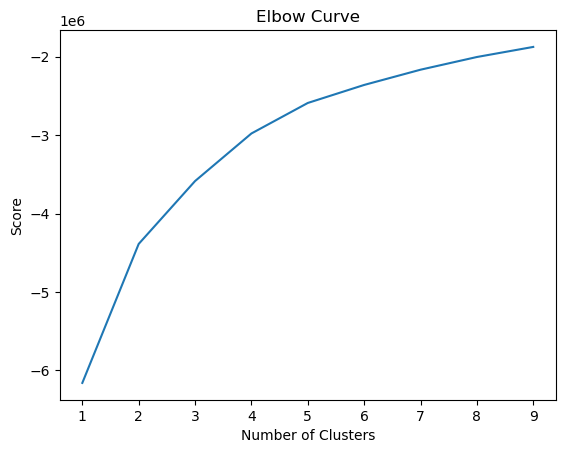

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I choose 5 clusters because after 5 the line seems to straighten out.

## 4. K-means clustering

In [20]:
# creating the k-means object

kmeans = KMeans(n_clusters = 4)

In [21]:
# fit the k-means object to the data

kmeans.fit(df2)

KMeans(n_clusters=4)

In [22]:
df2['clusters'] = kmeans.fit_predict(df2)

C:\Users\samir\AppData\Local\Temp\ipykernel_21584\3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [23]:
df2.head()

,teaching,international,research,citations,income,clusters
0,99.7,72.4,98.7,98.8,34.5,2
1,97.7,54.6,98.0,99.9,83.7,2
2,97.8,82.3,91.4,99.9,87.5,2
3,98.3,29.5,98.1,99.2,64.3,2
4,90.9,70.3,95.4,99.9,0.0,2


In [24]:
df2['clusters'].value_counts()

0    1047
1     801
3     411
2     335
Name: clusters, dtype: int64

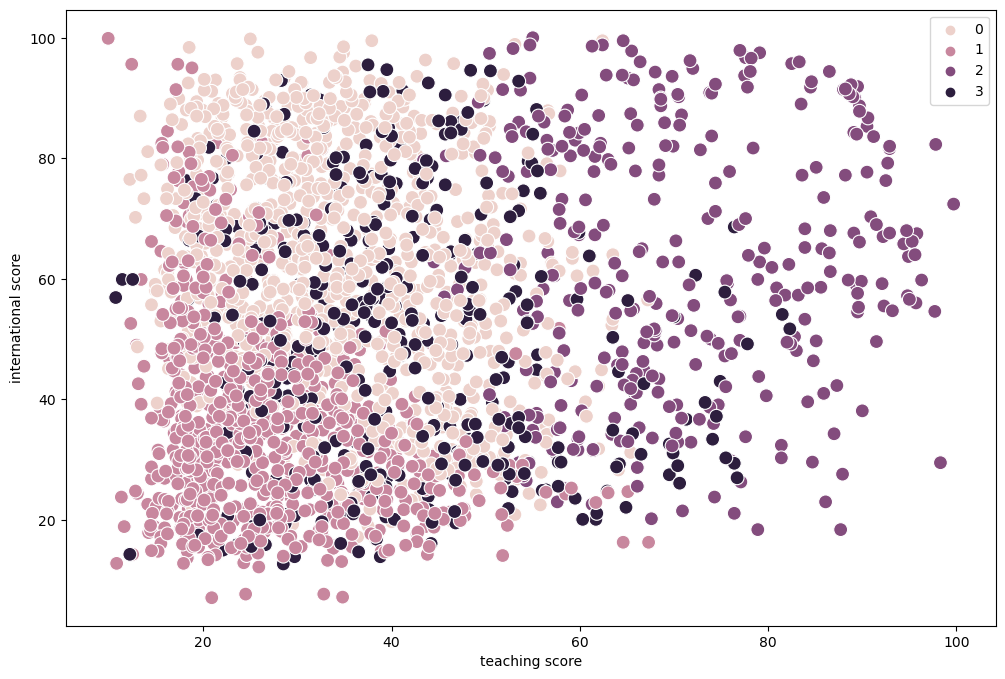

In [25]:
# plotting the clusters for the "teaching" and "international" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['teaching'], y=df2['international'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching score') # Label x-axis.
plt.ylabel('international score') # Label y-axis.
plt.show()

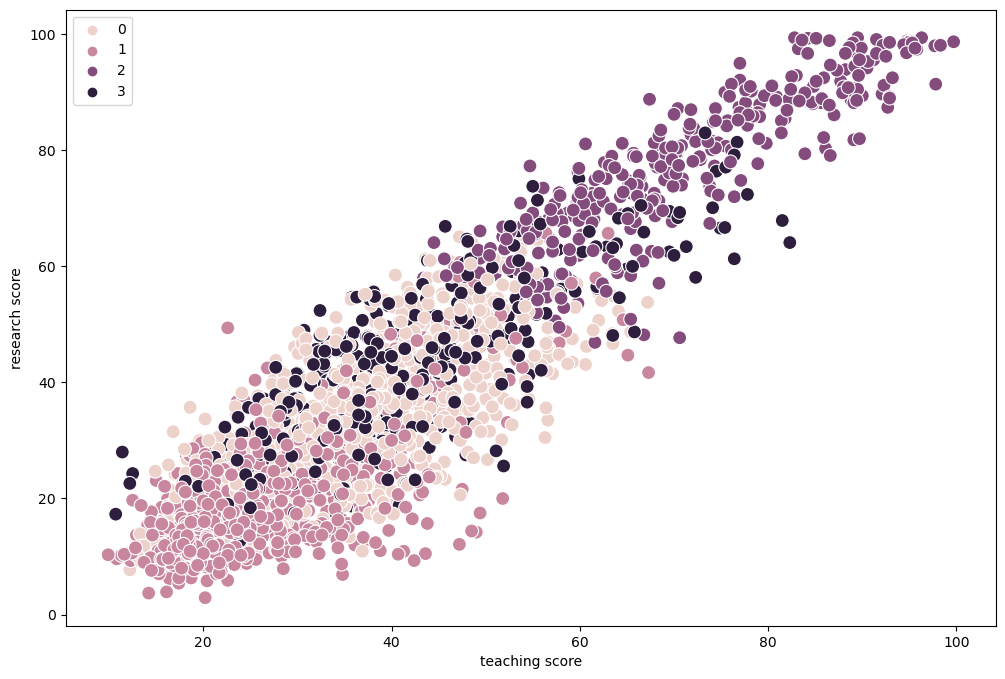

In [26]:
# plotting the clusters for the "teaching" and "research" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['teaching'], y=df2['research'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching score') # Label x-axis.
plt.ylabel('research score') # Label y-axis.
plt.show()

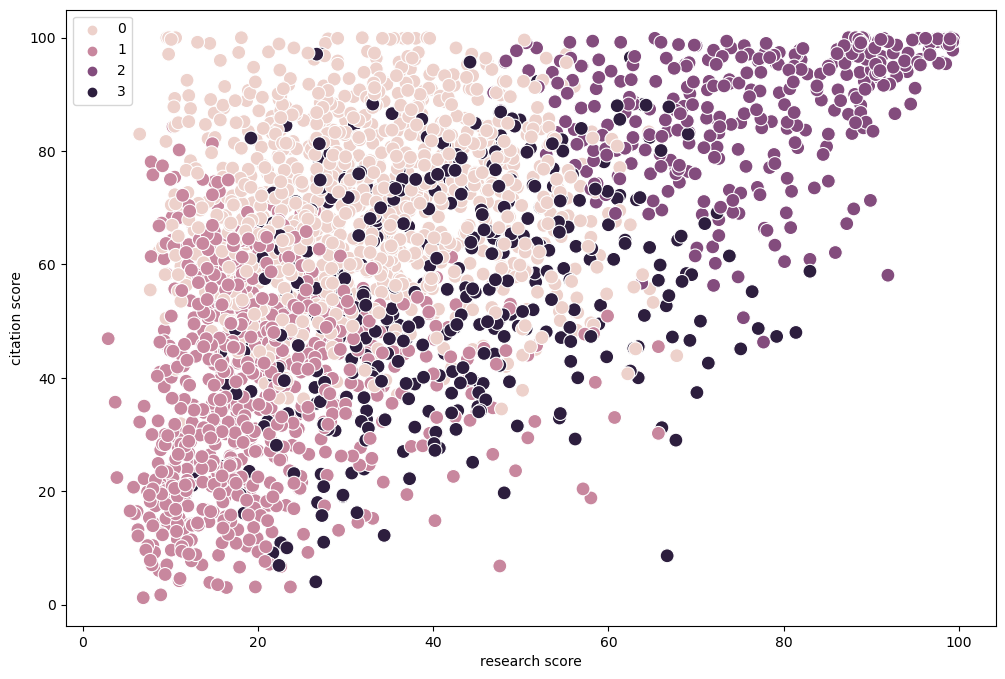

In [27]:
# plotting the clusters for the "teaching" and "research" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['research'], y=df2['citations'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('research score') # Label x-axis.
plt.ylabel('citation score') # Label y-axis.
plt.show()

### Plot Analysis
The clusters seem to follow the same patterns regardless of the variables being examined which showed me that these variables do have relation to each other. Within all three clusters, the cluster (labeled "0") contained the best score of each variable and were generally the most sparsely populated as well as generally located in the upper left hand corner of each graph. On the other hand, the cluster (labeled "4") seemed to change location over the various graphs signiflying that it is more influenced by factors not being analyzed in this particular analysis.

In [40]:
# grouping clusters
df2.loc[df2['clusters'] == 3, 'cluster'] = 'good'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'exceptional'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'below average'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'average'

In [41]:
df2.groupby('cluster').agg({'research':['mean', 'median'], 
                         'teaching':['mean', 'median'], 
                         'international':['mean', 'median'],
                          'citations':['mean', 'median']})

research          teaching        international         \
                    mean median       mean median          mean median   
cluster                                                                  
average        32.646609   32.2  34.610697   33.9     61.558453   61.6   
below average  20.245693   18.1  26.877403   24.8     35.748814   33.1   
exceptional    76.802090   77.1  70.787761   68.6     62.551045   61.2   
good           40.992457   40.2  40.059124   38.1     50.769343   50.8   

               citations         
                    mean median  
cluster                          
average        71.016810   71.5  
below average  39.263296   41.0  
exceptional    87.741194   90.9  
good           55.368613   55.6

#### Group By Analysis
This chart reinforces my previously made statements that the values within the cluster (labeled "0", or whitish pink) represent the best of the best when it comes to scoring. This cluster would be beneficial when trying to analyse what types of scores are needed for schools to be considered top universities.

In [42]:
df2.head()

,teaching,international,research,citations,income,clusters,cluster
0,99.7,72.4,98.7,98.8,34.5,2,exceptional
1,97.7,54.6,98.0,99.9,83.7,2,exceptional
2,97.8,82.3,91.4,99.9,87.5,2,exceptional
3,98.3,29.5,98.1,99.2,64.3,2,exceptional
4,90.9,70.3,95.4,99.9,0.0,2,exceptional


In [43]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,num_students,student_staff_ratio,percent_international,female_male_ratio,percent_female,percent_male,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,20152,8.9,0.25,0,0.00,0.00,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,2243,6.9,0.27,33 : 67,0.33,0.67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,11074,9.0,0.33,37 : 63,0.37,0.63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,15596,7.8,0.22,1.79,0.42,0.58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,0.0,7929,8.4,0.27,1.91,0.45,0.55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,21958,15.3,0.03,2.04,0.48,0.52,2016
2599,601-800,Y?ld?z Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,31268,28.7,0.02,36 : 64,0.36,0.64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,4122,3.7,0.03,0,0.00,0.00,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,10117,12.1,0.08,28 : 72,0.28,0.72,2016


In [44]:
df2

,teaching,international,research,citations,income,clusters,cluster
0,99.7,72.4,98.7,98.8,34.5,2,exceptional
1,97.7,54.6,98.0,99.9,83.7,2,exceptional
2,97.8,82.3,91.4,99.9,87.5,2,exceptional
3,98.3,29.5,98.1,99.2,64.3,2,exceptional
4,90.9,70.3,95.4,99.9,0.0,2,exceptional
...,...,...,...,...,...,...,...
2598,18.6,24.3,10.9,26.5,35.4,1,below average
2599,14.5,14.9,7.6,19.3,44.0,1,below average
2600,24.0,16.1,10.2,36.4,37.9,1,below average
2601,20.1,23.3,16.0,13.5,40.4,1,below average


In [37]:
df.to_csv(os.path.join(path, 'Data', 'timesdata_clean.csv'))

In [45]:
df2.to_csv(os.path.join(path, 'Data', 'timesdata_clusters.csv'))